In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [5]:
data = pd.read_csv("../data/cars_dataset.csv")

data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
## checking for na values
data.isna().sum().sum()

0

In [7]:
# grabbing median year
median_year = data['model'].median()
median_year

76.0

In [8]:
# setting up the filtered data to work with
work_set = data[(data['model'] >= median_year) & ((data['origin'] == 1) | (data['origin'] == 3))]
work_set_acc = work_set['acceleration']
jpn_cars = work_set[work_set['origin'] == 3]["acceleration"]
usa_cars = work_set[work_set['origin'] == 1]["acceleration"]

# declare significance level

a = 0.05
#comparing shapes
print(data.shape)
print(work_set.shape)
print("Japanese cars count : ", jpn_cars.shape)
print("American cars count : ", usa_cars.shape)
work_set.head(5)


(398, 9)
(179, 9)
Japanese cars count :  (54,)
American cars count :  (125,)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
184,25.0,4,140.0,92.00,2572.0,14.9,76,1,capri ii
185,26.0,4,98.0,79.00,2255.0,17.7,76,1,dodge colt
187,17.5,8,305.0,140.0,4215.0,13.0,76,1,chevrolet chevelle malibu classic
188,16.0,8,318.0,150.0,4190.0,13.0,76,1,dodge coronet brougham
189,15.5,8,304.0,120.0,3962.0,13.9,76,1,amc matador


In [9]:
#based upon the same data in the test
#we wanna do the independent t-test
t_test, p_value = stats.ttest_ind(usa_cars, jpn_cars, alternative="greater")

print(t_test, p_value)

# appears that the null is more likely

-1.0163338896871557 0.8445711798616595


In [10]:
# Small effect size due to value being close to .2
mean_diff = usa_cars.mean() - jpn_cars.mean()
pooled_std = np.sqrt(((usa_cars.var() + jpn_cars.var()) / 2))
ratio = mean_diff / pooled_std
ratio

-0.17331959628141816

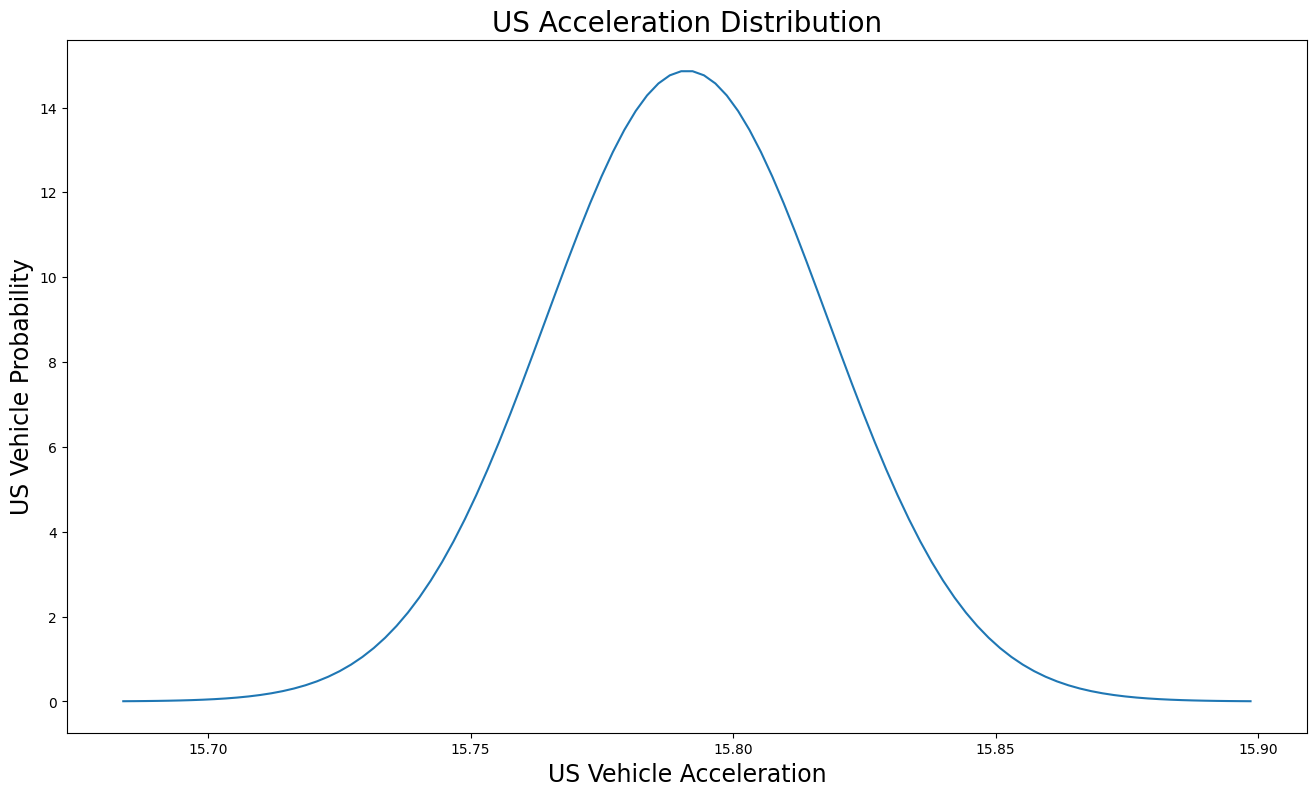

In [21]:
usa_mean = usa_cars.mean()
SE = np.sqrt(.1*(1-.1)/len(usa_cars))
x = np.linspace( usa_mean - 4 * SE, usa_mean + 4 * SE,num=100)
plt.figure(figsize=(16,9))
plt.plot(x, stats.norm.pdf(x, loc=usa_mean, scale=SE))
plt.xlabel("US Vehicle Acceleration", fontsize = 17)
plt.ylabel("US Vehicle Probability", fontsize = 17)
plt.title('US Acceleration Distribution', fontsize= 20)
plt.show()

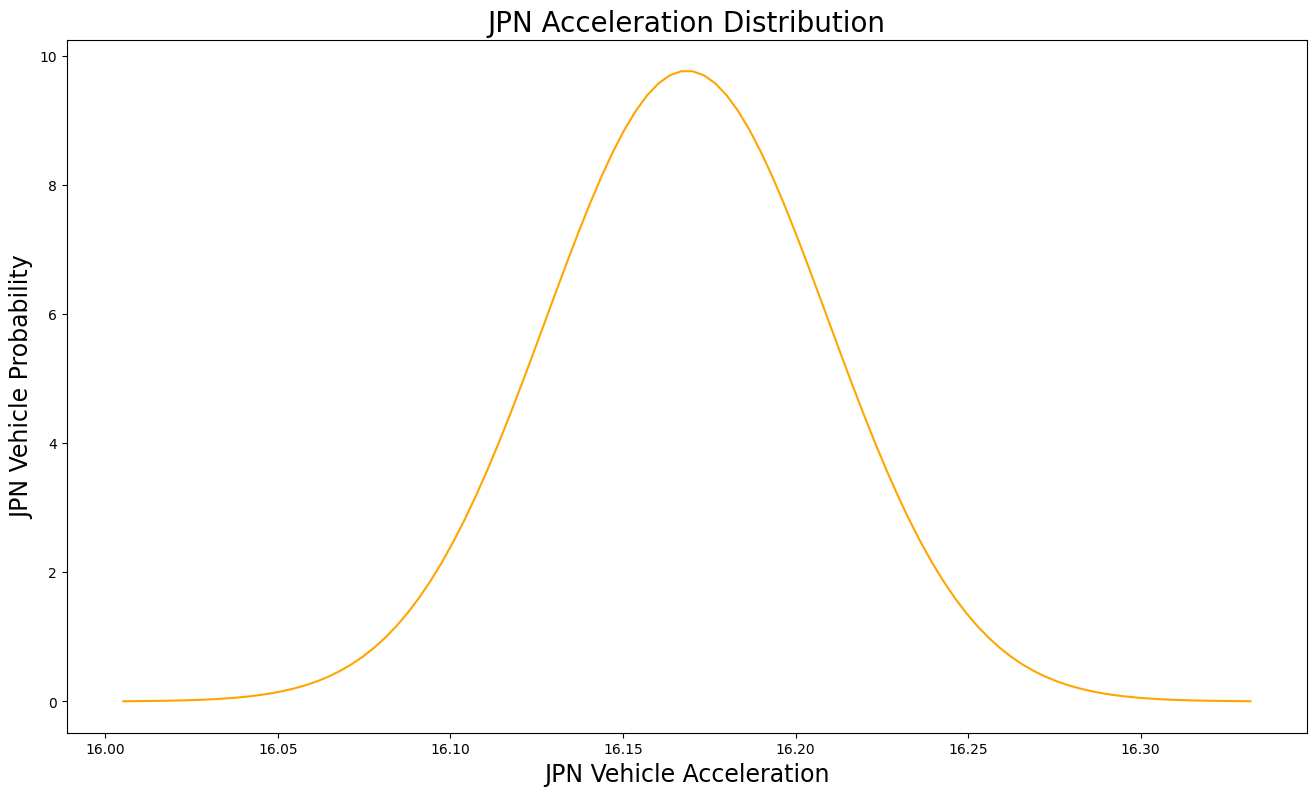

In [22]:
SE = np.sqrt(.1*(1-.1)/len(jpn_cars))
jpn_mean = jpn_cars.mean()
x = np.linspace( jpn_mean - 4 * SE, jpn_mean + 4 * SE,num=100)
plt.figure(figsize=(16,9))
plt.plot(x, stats.norm.pdf(x, loc=jpn_mean, scale=SE), color='orange')
plt.xlabel("JPN Vehicle Acceleration", fontsize = 17)
plt.ylabel("JPN Vehicle Probability", fontsize = 17)
plt.title('JPN Acceleration Distribution', fontsize = 20)
plt.show()

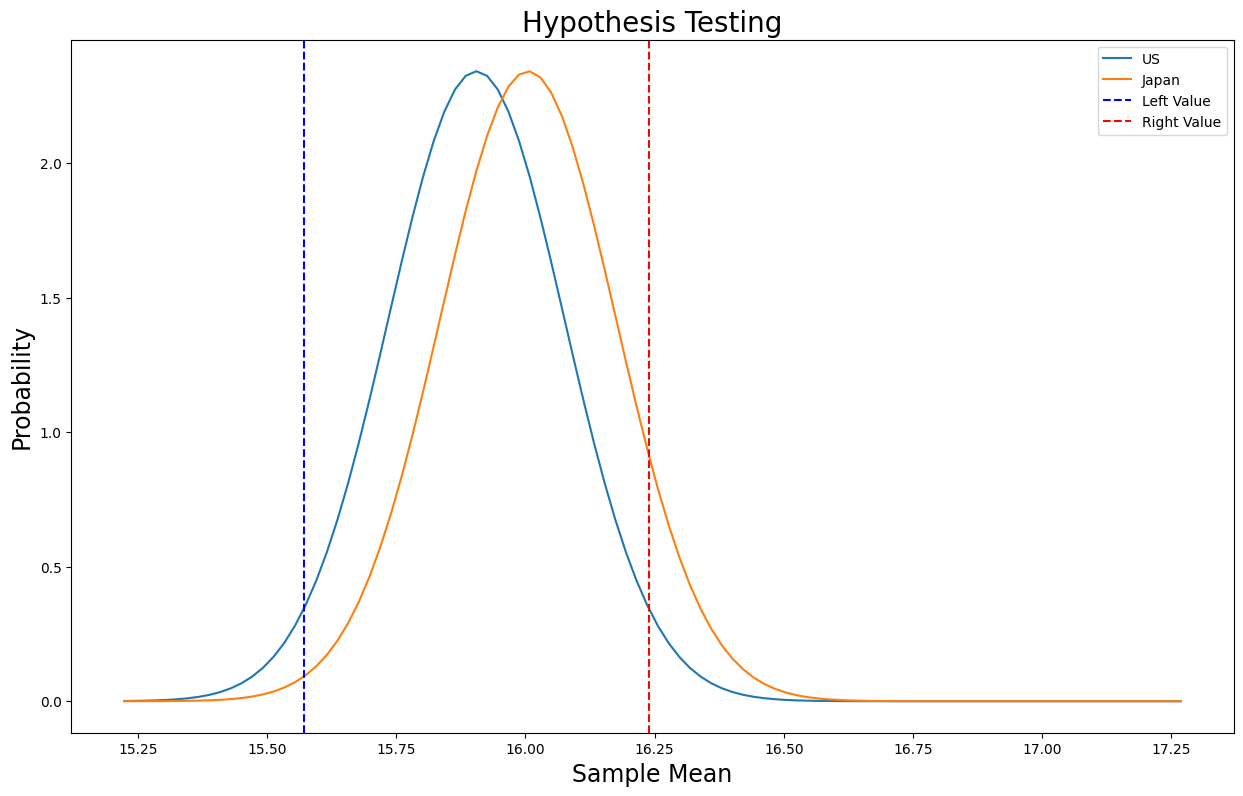

In [20]:
sample_mean = np.mean(work_set_acc)
sample_size = len(work_set_acc)
sample_std = np.std(work_set_acc, ddof=1)
SE = sample_std / np.sqrt(sample_size)

plt.figure(figsize=(15, 9))
x = np.linspace(sample_mean - 4 * SE, sample_mean + 8 * SE, num=100)

null_h = stats.norm(loc=sample_mean, scale=SE)
alt_h = stats.norm(loc=sample_mean + 0.1, scale=SE)

left_val = null_h.ppf(0.025)
right_val = null_h.ppf(0.975)

plt.plot(x, null_h.pdf(x), label='US')
plt.plot(x, alt_h.pdf(x), label='Japan')
plt.axvline(left_val, color='blue', linestyle='--', label='Left Value')
plt.axvline(right_val, color='red', linestyle='--', label='Right Value')

plt.legend()
plt.xlabel('Sample Mean', fontsize = 17)
plt.ylabel('Probability', fontsize = 17)
plt.title('Hypothesis Testing', fontsize = 20)
plt.show()

In [14]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = norm(mu0, standard_error)
    ha = norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power, ha

n = len(work_set_acc)
mua = jpn_mean
mu0 = usa_mean
sigma = sample_std
alpha = .05

power_jpn = compute_power(n,sigma,alpha,mua,mu0)[0]

power_usa = compute_power(n,sigma,alpha,mua=usa_mean,mu0=jpn_mean)[0]
# print("JPN: %.08f% ",power_jpn, "\nUSA: %.08f ",power_usa)
print("Japan: {:.15f} \nUSA: {:.15f}".format(power_jpn,power_usa))


Japan: 0.000056936597091 
USA: 0.000056936597091
